Proyek Analisis Data: Wine Quality Analysis
Menentukan Pertanyaan Bisnis
    1. Bagaimana distribusi kualitas anggur berdasarkan berbagai fitur kimia?
    2. Apakah ada korelasi yang signifikan antara fitur kimia tertentu dengan kualitas anggur?
    3. Bagaimana pengaruh alkohol, keasaman, dan kandungan gula terhadap kualitas anggur?
    4. Apakah ada perbedaan signifikan antara anggur merah dan anggur putih dalam hal kualitas dan fitur kimia?

Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling
Gathering Data

In [2]:
# Memuat dataset anggur merah dan putih
red_wine_df = pd.read_csv('winequality-red.csv', sep=';')
white_wine_df = pd.read_csv('winequality-white.csv', sep=';')

# Menampilkan 5 baris pertama dari dataset anggur merah
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Assessing Data
Menilai Data Anggur Merah

In [3]:
# Melihat informasi umum dari dataset anggur merah
red_wine_df.info()

# Mengecek adanya missing values
print(red_wine_df.isna().sum())

# Mengecek adanya duplikasi data
print("Jumlah duplikasi : ", red_wine_df.duplicated().sum())

# Melihat statistik deskriptif dari dataset anggur merah
red_wine_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Menilai Data Anggur Putih

In [4]:
# Melihat informasi umum dari dataset anggur putih
white_wine_df.info()

# Mengecek adanya missing values
print(white_wine_df.isna().sum())

# Mengecek adanya duplikasi data
print("Jumlah duplikasi : ", white_wine_df.duplicated().sum())

# Melihat statistik deskriptif dari dataset anggur putih
white_wine_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Cleaning Data
Membersihkan Data Anggur Merah dan Putih

Menggabungkan Data Anggur Merah dan Putih Untuk kemudahan analisis, kita akan menggabungkan kedua dataset ini dan menambahkan kolom tambahan untuk membedakan antara anggur merah dan putih.

In [5]:
# Menambahkan kolom 'type' untuk membedakan anggur merah dan putih
red_wine_df['type'] = 'red'
white_wine_df['type'] = 'white'

# Menggabungkan kedua dataset
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Menampilkan 5 baris pertama dari dataset gabungan
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Exploratory Data Analysis (EDA)
Distribusi Kualitas Anggur

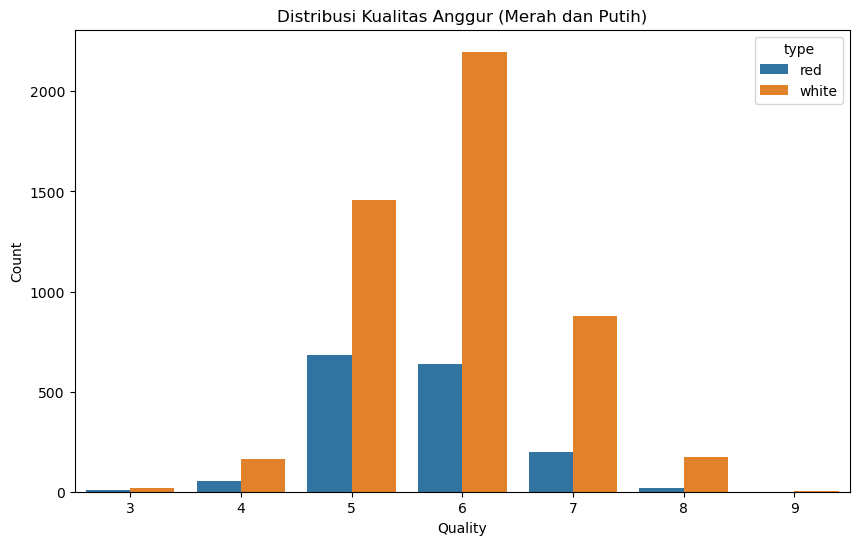

In [6]:
# Plot distribusi kualitas anggur
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_df, x='quality', hue='type')
plt.title('Distribusi Kualitas Anggur (Merah dan Putih)')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


Korelasi antara Fitur Kimia dan Kualitas

<Axes: >

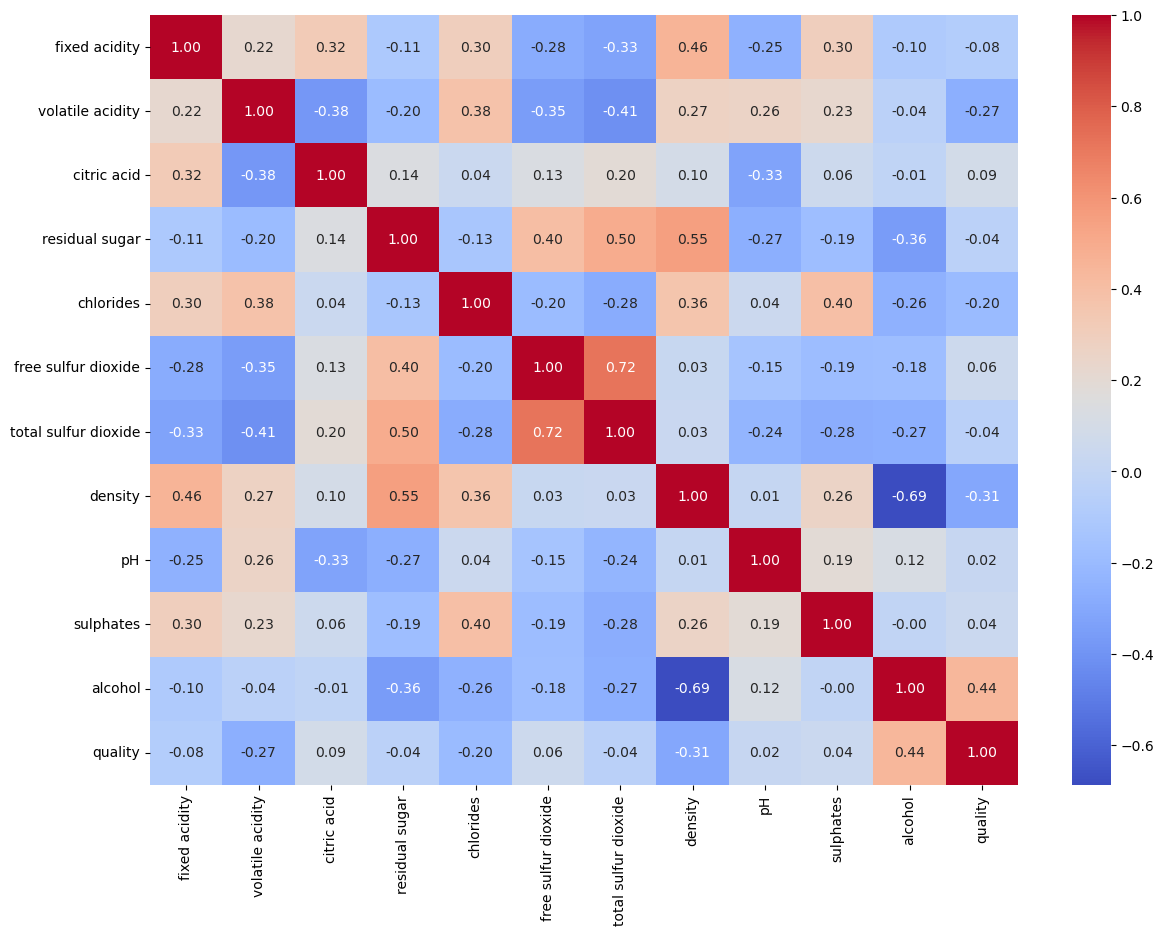

In [8]:
# Heatmap korelasi antara semua fitur
numeric_columns = wine_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
sns.heatmap(wine_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')

Pengaruh Alkohol, Keasaman, dan Gula Terhadap Kualitas

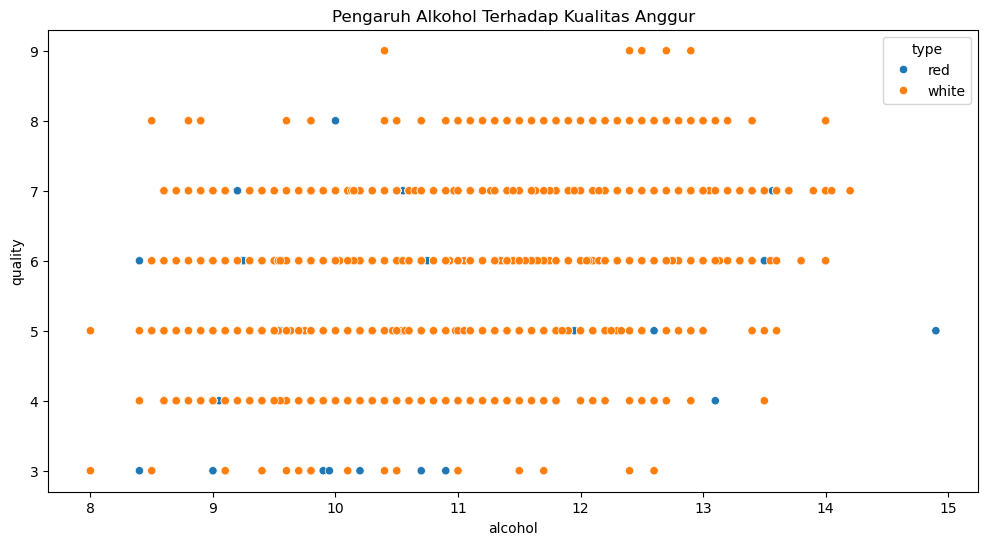

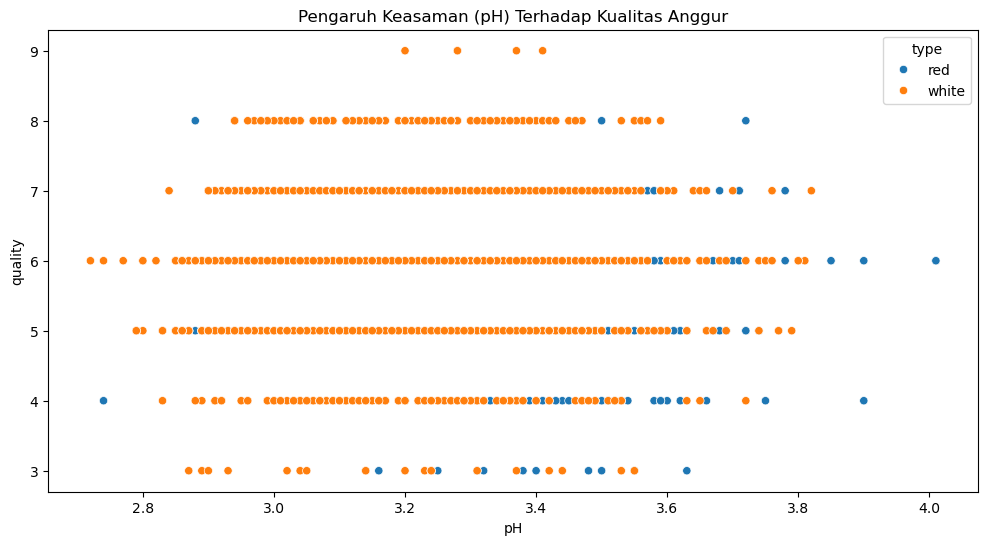

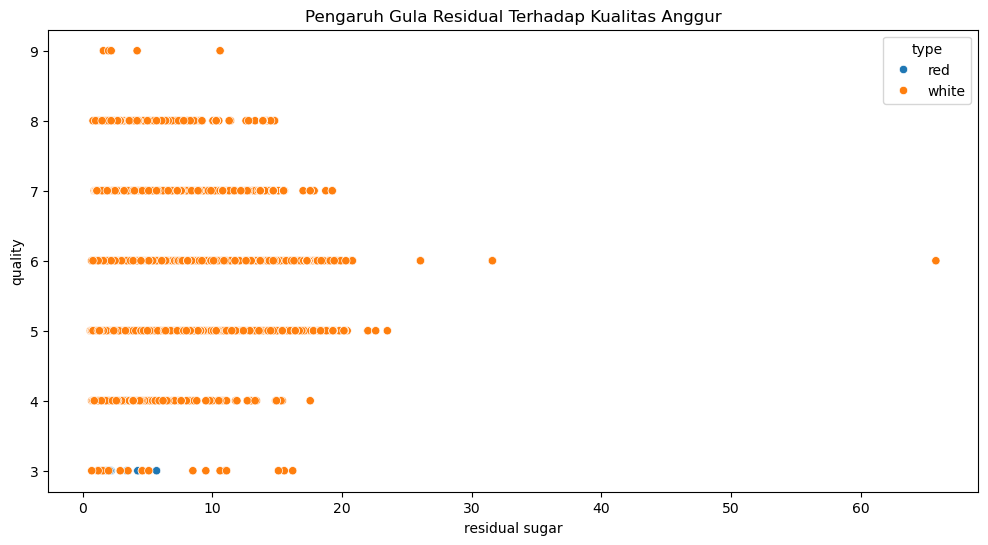

In [9]:
# Scatter plot Alkohol vs Kualitas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=wine_df, x='alcohol', y='quality', hue='type')
plt.title('Pengaruh Alkohol Terhadap Kualitas Anggur')
plt.show()

# Scatter plot pH vs Kualitas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=wine_df, x='pH', y='quality', hue='type')
plt.title('Pengaruh Keasaman (pH) Terhadap Kualitas Anggur')
plt.show()

# Scatter plot Residual Sugar vs Kualitas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=wine_df, x='residual sugar', y='quality', hue='type')
plt.title('Pengaruh Gula Residual Terhadap Kualitas Anggur')
plt.show()


# Hasil Analisis Kualitas Anggur

## 1. Bagaimana distribusi kualitas anggur berdasarkan berbagai fitur kimia?

Berdasarkan grafik distribusi kualitas anggur, kita dapat menyimpulkan:

- Mayoritas anggur, baik merah maupun putih, memiliki kualitas antara 5 hingga 7.
- Anggur kualitas 6 adalah yang paling umum untuk kedua jenis.
- Anggur dengan kualitas ekstrem (3-4 atau 8-9) relatif jarang.
- Anggur putih cenderung memiliki lebih banyak sampel dengan kualitas yang lebih tinggi dibandingkan anggur merah.

## 2. Apakah ada korelasi yang signifikan antara fitur kimia tertentu dengan kualitas anggur?

Dari heatmap korelasi, kita dapat mengamati:

- Alkohol memiliki korelasi positif yang paling kuat dengan kualitas anggur (sekitar 0.44).
- Volatile acidity memiliki korelasi negatif yang cukup signifikan dengan kualitas (-0.27), terutama pada anggur merah.
- Densitas memiliki korelasi negatif lemah dengan kualitas (-0.31).
- Klorid dan total sulfur dioxide memiliki korelasi negatif lemah dengan kualitas.

## 3. Bagaimana pengaruh alkohol, keasaman, dan kandungan gula terhadap kualitas anggur?

a) Alkohol:
   - Terdapat tren positif yang jelas antara kadar alkohol dan kualitas anggur.
   - Anggur dengan kadar alkohol yang lebih tinggi cenderung memiliki kualitas yang lebih baik.
   - Anggur putih dengan kadar alkohol tinggi cenderung memiliki kualitas yang lebih tinggi dibandingkan anggur merah.

b) Keasaman (pH):
   - Tidak ada hubungan yang sangat jelas antara pH dan kualitas anggur.
   - Namun, anggur berkualitas tinggi cenderung memiliki pH dalam rentang tertentu (sekitar 3.0 - 3.4).
   - Anggur merah umumnya memiliki pH yang sedikit lebih tinggi dibandingkan anggur putih.

c) Kandungan Gula (Residual Sugar):
   - Sebagian besar anggur memiliki kandungan gula residual yang rendah.
   - Anggur putih memiliki variasi kandungan gula yang lebih besar dibandingkan anggur merah.
   - Tidak ada hubungan linear yang jelas antara kandungan gula dan kualitas, tetapi anggur berkualitas tinggi cenderung memiliki kandungan gula yang moderat.

## 4. Apakah ada perbedaan signifikan antara anggur merah dan anggur putih dalam hal kualitas dan fitur kimia?

Berdasarkan analisis kita:

- Distribusi Kualitas:
  - Anggur putih cenderung memiliki lebih banyak sampel dengan kualitas yang lebih tinggi.
  - Anggur merah memiliki distribusi yang lebih terpusat di sekitar kualitas 5-6.

- Alkohol:
  - Anggur putih dengan kadar alkohol tinggi cenderung memiliki kualitas yang lebih tinggi dibandingkan anggur merah.

- pH:
  - Anggur merah umumnya memiliki pH yang sedikit lebih tinggi dibandingkan anggur putih.

- Residual Sugar:
  - Anggur putih memiliki variasi kandungan gula yang jauh lebih besar dibandingkan anggur merah.
  - Beberapa anggur putih memiliki kandungan gula yang sangat tinggi, yang jarang ditemui pada anggur merah.

Kesimpulannya, terdapat perbedaan yang cukup signifikan antara anggur merah dan putih dalam hal distribusi kualitas dan beberapa fitur kimia utama. Faktor-faktor yang mempengaruhi kualitas mungkin berbeda antara kedua jenis anggur ini.